In [5]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt #type: ignore

#import datasets
ratings = pd.read_csv("BX-Ratings.csv")
new_ratings = pd.read_csv("BX-NewBooksRatings.csv")
series = [ratings, new_ratings]

#Combine both books and newbooks to be one dataframe
df_ratings = pd.concat(series)

In [6]:
#import datasets
books = pd.read_csv("BX-Books.csv")
new_books = pd.read_csv("BX-NewBooks.csv")
series = [books, new_books]

#Combine both books and newbooks to be one dataframe
df_books = pd.concat(series)

In [7]:
# remove duplicates, one ISBN can only be rated by the same User-ID by one time
df_ratings['ISBN'] = df_ratings['ISBN'].str.strip()  # Remove leading/trailing spaces
df_ratings['ISBN'] = df_ratings['ISBN'].str.upper()  # Convert to upper case to ensure uniformity

df_ratings = df_ratings.drop_duplicates(subset=['ISBN', 'User-ID'], keep='first')

In [19]:
print("Rating less or equal to 0: ", sum(df_ratings['Book-Rating'] <= 0))
print("Rating bigger than 10: ", sum(df_ratings['Book-Rating'] > 10))

Rating less or equal to 0:  0
Rating bigger than 10:  0


In [8]:
# Check for book-rating, can only be a range of 1-10. If book rating out of range, or NaN or empty, input the average of book rating'''
df_ratings['Book-Rating'] = pd.to_numeric(df_ratings['Book-Rating'], errors='coerce')

# Filter valid ratings and compute their average
valid_ratings = df_ratings[(df_ratings['Book-Rating'] >= 1) & (df_ratings['Book-Rating'] <= 10)]
df_ratings = valid_ratings.copy()

In [9]:
# Merge ratings with book details
book_rating = pd.merge(df_ratings, df_books, on="ISBN")

ratings_count_per_book = book_rating.groupby('ISBN')['Book-Rating'].count().reset_index()
ratings_count_per_book.columns = ['ISBN', 'Rating-Count']

# Count the number of unique ISBNs for each 'Rating-Count'
rating_count_freq = ratings_count_per_book.groupby('Rating-Count')['ISBN'].nunique().reset_index()
rating_count_freq.columns = ['Rating-Count', 'Number of Unique ISBNs']

In [14]:
print(len(df_ratings))

230936


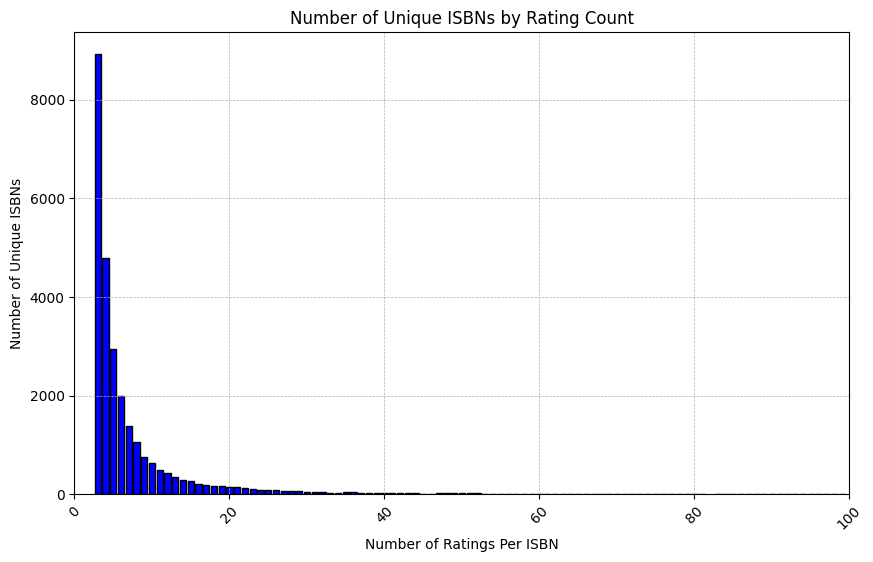

In [11]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(rating_count_freq['Rating-Count'], rating_count_freq['Number of Unique ISBNs'], color='blue', edgecolor='black')
plt.title('Number of Unique ISBNs by Rating Count')
plt.xlabel('Number of Ratings Per ISBN')
plt.ylabel('Number of Unique ISBNs')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility if needed
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(0,100)
plt.show()

In [12]:
def preprocess_ratings(ratings_filename, newratings_filename):
    # Initiallize our datasets
    ratings = pd.read_csv(ratings_filename)
    newratings_filename = pd.read_csv(newratings_filename)
    series = [ratings, newratings_filename]

    # Combine two datasets together
    df_ratings = pd.concat(series)

    # remove duplicates, one ISBN can only be rated by the same User-ID by one time
    df_ratings['ISBN'] = df_ratings['ISBN'].str.strip()  # Remove leading/trailing spaces
    df_ratings['ISBN'] = df_ratings['ISBN'].str.upper()  # Convert to upper case to ensure uniformity
    df_ratings = df_ratings.drop_duplicates(subset=['ISBN', 'User-ID'], keep='first')

    # Check for book-rating, can only be a range of 1-10. If book rating out of range, or NaN or empty, input the average of book rating'''
    df_ratings['Book-Rating'] = pd.to_numeric(df_ratings['Book-Rating'], errors='coerce')

    # Filter valid ratings and compute their average
    valid_ratings = df_ratings[(df_ratings['Book-Rating'] >= 1) & (df_ratings['Book-Rating'] <= 10)]
    df_ratings = valid_ratings.copy()

    return df_ratings
